# Exploratory Data Analysis

## Load the dataset

In [3]:
import sys
# import the py file for loading the dataset
if "..\\121-layer\\src" not in sys.path:
    sys.path.insert(0,r'..\121-layer\src')
print(sys.path)

['..\\121-layer\\src', 'c:\\Users\\siyang\\Documents\\GitHub\\DeepLearningProject\\notebooks', 'C:\\Python312\\python312.zip', 'C:\\Python312\\DLLs', 'C:\\Python312\\Lib', 'C:\\Python312', 'c:\\Users\\siyang\\Documents\\GitHub\\DeepLearningProject\\.venv', '', 'c:\\Users\\siyang\\Documents\\GitHub\\DeepLearningProject\\.venv\\Lib\\site-packages', 'C:\\Users\\siyang\\Documents\\GitHub\\DeepLearningProject', 'c:\\Users\\siyang\\Documents\\GitHub\\DeepLearningProject\\.venv\\Lib\\site-packages\\win32', 'c:\\Users\\siyang\\Documents\\GitHub\\DeepLearningProject\\.venv\\Lib\\site-packages\\win32\\lib', 'c:\\Users\\siyang\\Documents\\GitHub\\DeepLearningProject\\.venv\\Lib\\site-packages\\Pythonwin']


## Dataset Statistics

In [26]:
import torch
torch.manual_seed(42)

In [39]:
## download labels from https://nihcc.app.box.com/v/ChestXray-NIHCC/folder/36938765345
from preprocessing import *
train_dataset, val_dataset,train_loader, val_loader,test_dataset, test_loader= get_data_loaders(data_dir='../raw_data/archive/', label_file='../raw_data/archive/CXR8-selected/Data_Entry_2017_v2020.csv')


In [28]:
print(f"length of train dataset: {len(train_dataset)} images")
train_dataset.dataset.labels_df.iloc[train_dataset.indices, :]

length of train dataset: 8484 images


,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Pneumothorax,path
138,00000368_010.png,No Finding,6,368,35,M,AP,3056,2544,0.139000,0.139000,0,../raw_data/archive\images_001\images\00000368...
4500,00015654_002.png,Pneumothorax,2,15654,44,F,PA,2854,2991,0.143000,0.143000,1,../raw_data/archive\images_007\images\00015654...
792,00028940_003.png,No Finding,3,28940,63,M,PA,2021,2021,0.194311,0.194311,0,../raw_data/archive\images_012\images\00028940...
1299,00023091_002.png,Effusion|Mass|Pneumothorax,2,23091,66,F,PA,2992,2991,0.143000,0.143000,1,../raw_data/archive\images_010\images\00023091...
4230,00011752_004.png,Pneumothorax,4,11752,35,M,AP,2500,2048,0.168000,0.168000,1,../raw_data/archive\images_006\images\00011752...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6501,00026586_011.png,Emphysema|Pneumothorax,11,26586,37,M,PA,2992,2991,0.143000,0.143000,1,../raw_data/archive\images_011\images\00026586...
234,00019201_011.png,Infiltration|Pneumothorax,3,19201,60,M,AP,2500,2048,0.168000,0.168000,1,../raw_data/archive\images_009\images\00019201...
4372,00012045_043.png,No Finding,43,12045,45,F,PA,2048,2500,0.168000,0.168000,0,../raw_data/archive\images_006\images\00012045...
1361,00019097_007.png,Pneumothorax,7,19097,64,M,PA,2778,2991,0.143000,0.143000,1,../raw_data/archive\images_009\images\00019097...


In [29]:
print(f"length of validation dataset: {len(val_dataset)} images")
val_dataset.dataset.labels_df.iloc[val_dataset.indices, :]

length of validation dataset: 1060 images


,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Pneumothorax,path
8492,00008232_011.png,Atelectasis|Infiltration|Pneumothorax,11,8232,40,M,AP,2500,2048,0.168000,0.168000,1,../raw_data/archive\images_004\images\00008232...
9376,00016142_016.png,No Finding,2,16142,15,M,PA,2992,2991,0.143000,0.143000,0,../raw_data/archive\images_008\images\00016142...
8498,00018610_016.png,Atelectasis|Effusion|Infiltration,17,18610,63,M,AP,2500,2048,0.168000,0.168000,0,../raw_data/archive\images_009\images\00018610...
2270,00009959_002.png,Pneumothorax,8,9959,54,F,PA,2021,2021,0.194311,0.194311,1,../raw_data/archive\images_005\images\00009959...
7094,00015605_016.png,Infiltration,16,15605,32,F,AP,2500,2048,0.168000,0.168000,0,../raw_data/archive\images_007\images\00015605...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2091,00006674_002.png,No Finding,2,6674,30,M,AP,2500,2048,0.171000,0.171000,0,../raw_data/archive\images_004\images\00006674...
6651,00023313_010.png,Nodule|Pleural_Thickening|Pneumothorax,10,23313,50,M,PA,2992,2991,0.143000,0.143000,1,../raw_data/archive\images_010\images\00023313...
4448,00017046_008.png,Pneumothorax,8,17046,63,M,PA,2992,2991,0.143000,0.143000,1,../raw_data/archive\images_008\images\00017046...
1278,00006706_003.png,No Finding,3,6706,18,M,PA,2500,2048,0.171000,0.171000,0,../raw_data/archive\images_004\images\00006706...


In [30]:
print(f"length of test dataset: {len(test_dataset)} images")
test_dataset.dataset.labels_df.iloc[test_dataset.indices, :]

length of test dataset: 1060 images


,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Pneumothorax,path
5923,00003709_003.png,Atelectasis|Pneumothorax,13,3709,61,F,PA,1785,1678,0.194311,0.194311,1,../raw_data/archive\images_002\images\00003709...
7163,00010805_019.png,Effusion|Pneumothorax,17,10805,6,F,AP,2500,2048,0.168000,0.168000,1,../raw_data/archive\images_005\images\00010805...
3120,00006099_002.png,Pleural_Thickening,2,6099,31,M,PA,2992,2991,0.143000,0.143000,0,../raw_data/archive\images_003\images\00006099...
5223,00017643_000.png,Atelectasis,0,17643,88,M,PA,2778,2991,0.143000,0.143000,0,../raw_data/archive\images_008\images\00017643...
4722,00011620_000.png,No Finding,0,11620,61,M,PA,2500,2048,0.168000,0.168000,0,../raw_data/archive\images_006\images\00011620...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2179,00016797_014.png,Consolidation|Effusion|Pneumothorax,14,16797,73,F,AP,2500,2048,0.168000,0.168000,1,../raw_data/archive\images_008\images\00016797...
4159,00005179_006.png,Consolidation,6,5179,62,F,AP,2500,2048,0.171000,0.171000,0,../raw_data/archive\images_003\images\00005179...
288,00025954_040.png,Consolidation|Mass|Pneumothorax,40,25954,57,F,PA,1801,2021,0.194311,0.194311,1,../raw_data/archive\images_011\images\00025954...
1795,00021582_006.png,Pneumothorax,6,21582,72,F,PA,2714,2493,0.143000,0.143000,1,../raw_data/archive\images_010\images\00021582...


## View Dataset Samples

In [36]:
import torchvision
import matplotlib.pyplot as plt 

In [139]:
## Visualize the image in terms of 
from PIL import Image 
import numpy as np
image_dir = r'C:\Users\siyang\Documents\GitHub\DeepLearningProject\raw_data\archive\images_001\images\00000001_000.png'
img = Image.open(image_dir)
from torchvision import transforms

dataset = [img]
pixel_values = np.concatenate([transforms.PILToTensor()(image).flatten() for image in dataset])

class NormalizeGrayscale:
    def __call__(self, img):
        # Convert PIL image to tensor
        img_tensor = transforms.ToTensor()(img)
        
        # Calculate mean and standard deviation of the image tensor
        mean_value = torch.mean(img_tensor)
        std_value = torch.std(img_tensor)
        
        # Normalize the image tensor
        normalized_img = (img_tensor - mean_value) / std_value
        
        return normalized_img


# normalized_dataset
from torchvision import transforms
transform = transforms.Compose([
                                NormalizeGrayscale()
                                ])
print(transform(img))


tensor([[[ 1.0955,  1.0510,  0.9917,  ..., -1.8263, -1.8708, -1.9005],
         [ 1.0510,  1.0065,  0.9917,  ..., -1.8263, -1.8708, -1.9005],
         [ 1.0065,  0.9769,  0.9620,  ..., -1.8263, -1.8708, -1.9005],
         ...,
         [ 1.8816,  1.8816,  1.8816,  ..., -1.9005, -1.9005, -1.9005],
         [ 1.8816,  1.8816,  1.8668,  ..., -1.9005, -1.9005, -1.9005],
         [ 1.8816,  1.8816,  1.8816,  ..., -1.9005, -1.9005, -1.9005]]])


16


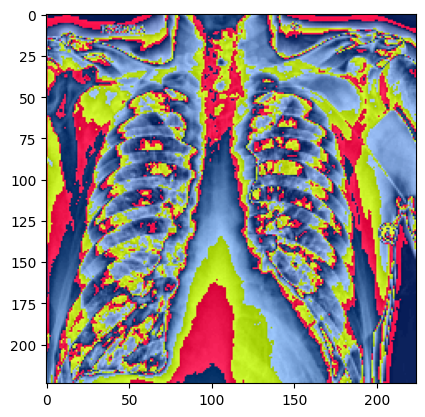

In [98]:
## View the first batch in train_loader
## for now just the first image
## DUDE can we see the pre transform version?
for inputs, labels in train_loader:
    print(len(inputs))
    
    trans = torchvision.transforms.ToPILImage()
    out = trans(inputs[0])
    plt.imshow(out)
    break

In [ ]:
def extract_dataframe_from_dataset(dataset):
    # Extract the DataFrame rows corresponding to the dataset indices
    indices = dataset.indices
    df = dataset.dataset.labels_df.iloc[indices].reset_index(drop=True)
    return df

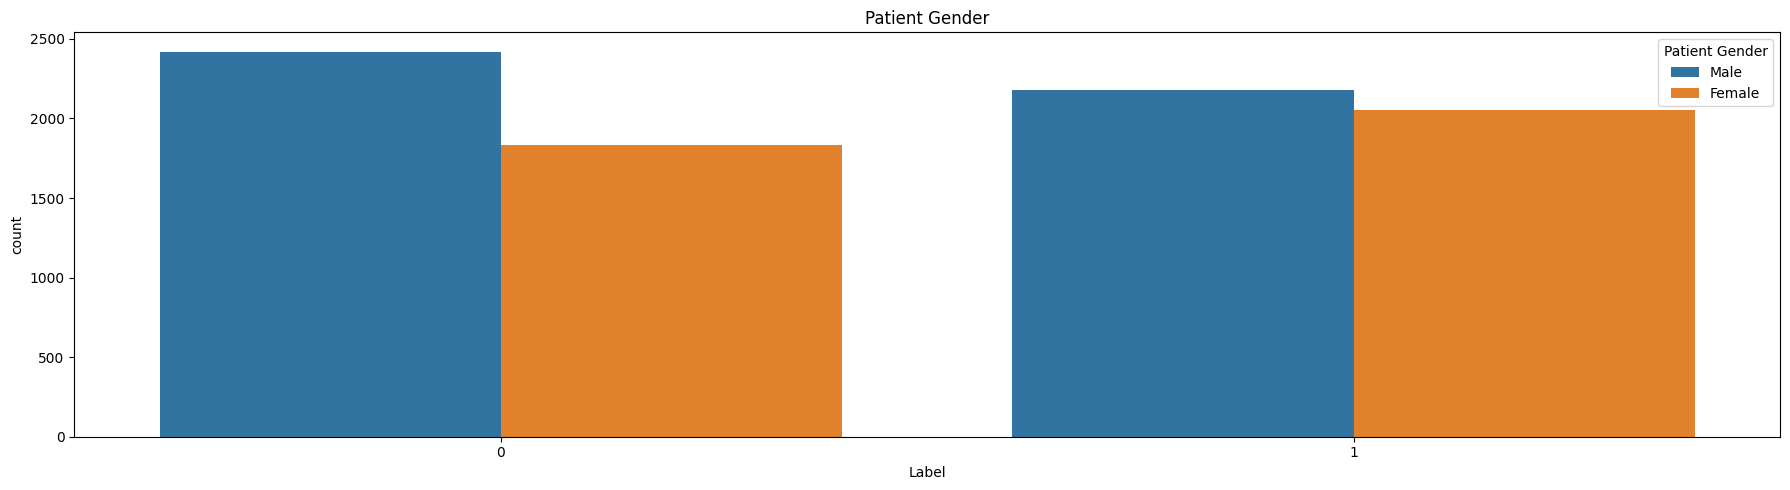

In [ ]:
# Training dataset
train_df = extract_dataframe_from_dataset(train_dataset)

# Normalized data
train_df['Age_normalized'] = (train_df['Patient Age'] - train_df['Patient Age'].min()) / (train_df['Patient Age'].max() - train_df['Patient Age'].min())
train_df['FollowUp_normalized'] = (train_df['Follow-up #'] - train_df['Follow-up #'].min()) / (train_df['Follow-up #'].max() - train_df['Follow-up #'].min())

# Count Male: 0, Female: 1
train_df['Gender_numeric'] = train_df['Patient Gender'].map({'M': 0, 'F': 1})

plt.figure(figsize=(18, 5))

# Gender
sns.countplot(x='Pneumothorax', hue='Gender_numeric', data=train_df)
plt.title('Patient Gender')
plt.xlabel('Label')
plt.legend(title='Patient Gender', labels=['Male', 'Female'])

plt.tight_layout()
plt.show()


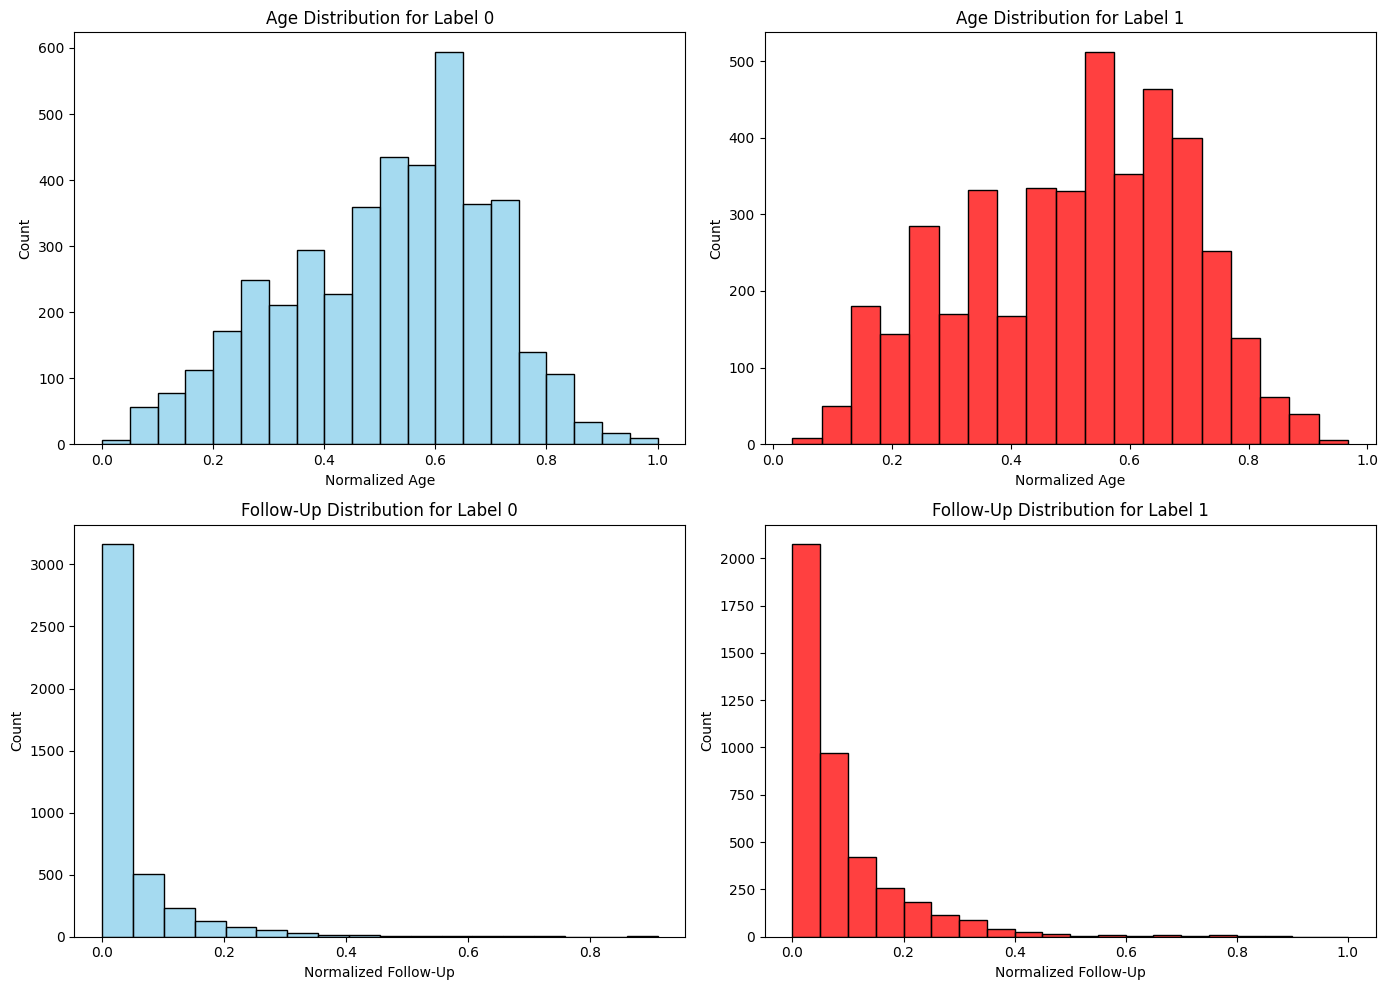

In [ ]:
#Separate
label_0_df = train_df[train_df['Pneumothorax'] == 0]
label_1_df = train_df[train_df['Pneumothorax'] == 1]

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

sns.histplot(label_0_df, x='Age_normalized', kde=False, color="skyblue", ax=axes[0, 0], binwidth=0.05)
axes[0, 0].set_title('Age Distribution for Label 0')
axes[0, 0].set_xlabel('Normalized Age')
axes[0, 0].set_ylabel('Count')


sns.histplot(label_1_df, x='Age_normalized', kde=False, color="red", ax=axes[0, 1], binwidth=0.05)
axes[0, 1].set_title('Age Distribution for Label 1')
axes[0, 1].set_xlabel('Normalized Age')
axes[0, 1].set_ylabel('Count')

sns.histplot(label_0_df, x='FollowUp_normalized', kde=False, color="skyblue", ax=axes[1, 0], binwidth=0.05)
axes[1, 0].set_title('Follow-Up Distribution for Label 0')
axes[1, 0].set_xlabel('Normalized Follow-Up')
axes[1, 0].set_ylabel('Count')

sns.histplot(label_1_df, x='FollowUp_normalized', kde=False, color="red", ax=axes[1, 1], binwidth=0.05)
axes[1, 1].set_title('Follow-Up Distribution for Label 1')
axes[1, 1].set_xlabel('Normalized Follow-Up')
axes[1, 1].set_ylabel('Count')

plt.tight_layout()
plt.show()

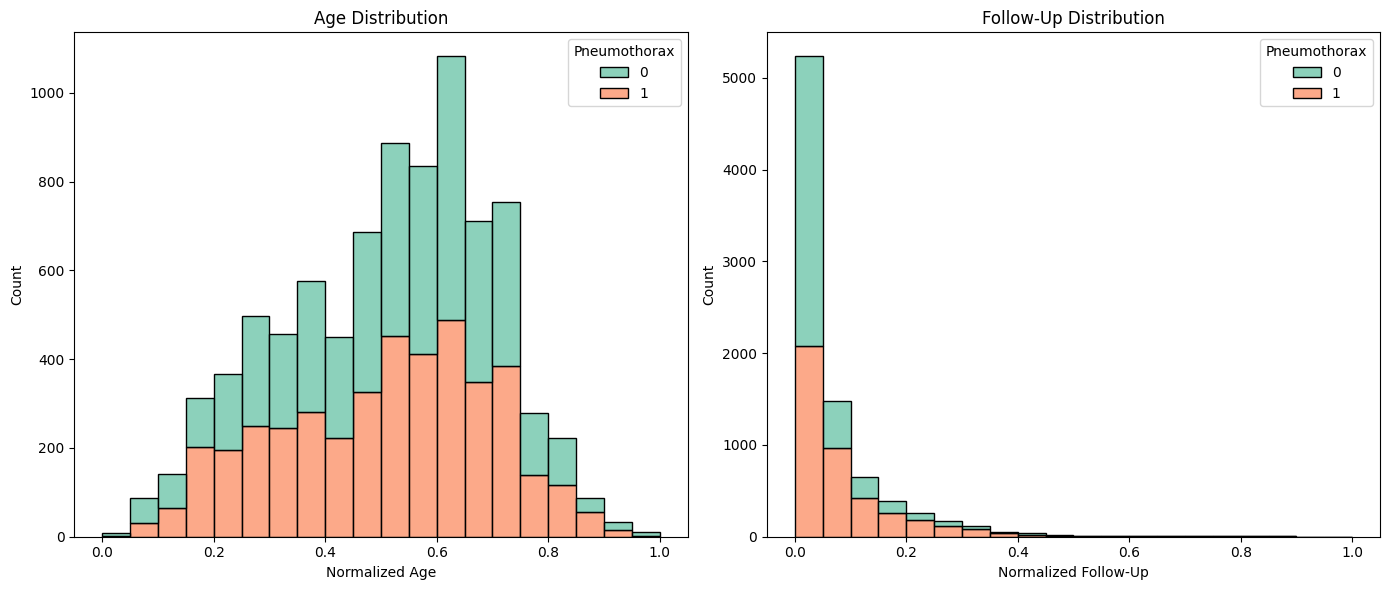

In [ ]:
#Merged

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(data=train_df, x='Age_normalized', hue='Pneumothorax', multiple="stack", kde=False, palette="Set2", binwidth=0.05)
plt.title('Age Distribution')
plt.xlabel('Normalized Age')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.histplot(data=train_df, x='FollowUp_normalized', hue='Pneumothorax', multiple="stack", kde=False, palette="Set2", binwidth=0.05)
plt.title('Follow-Up Distribution')
plt.xlabel('Normalized Follow-Up')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

Text(0, 0.5, 'Follow up ')

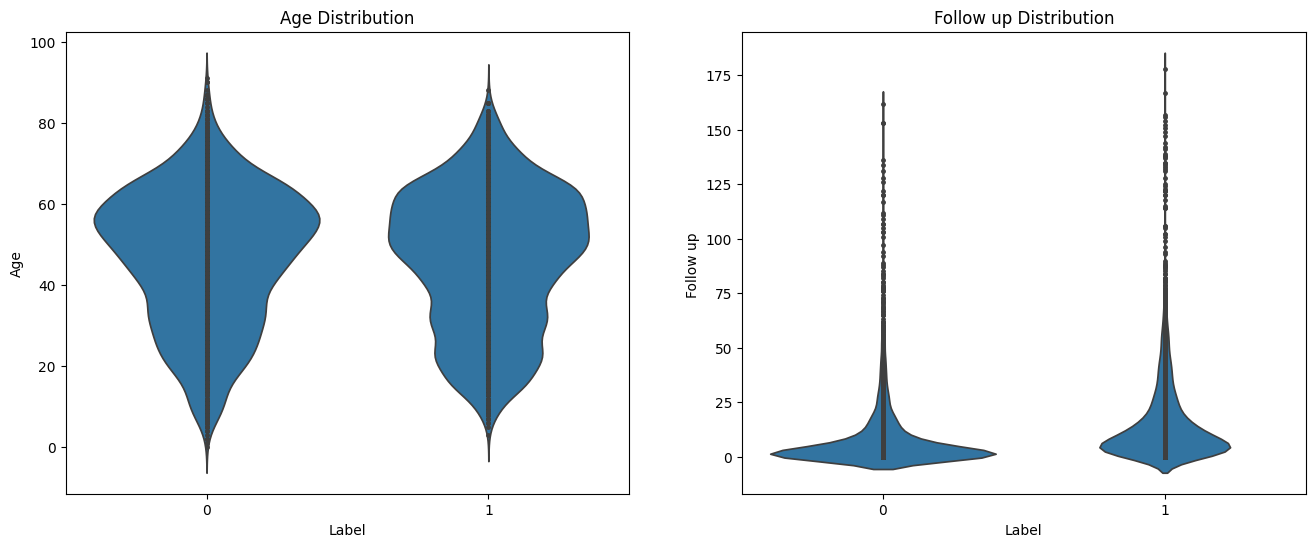

In [ ]:
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
sns.violinplot(x='Pneumothorax', y='Patient Age', data=train_df, inner="point")
plt.title('Age Distribution')
plt.xlabel('Label')
plt.ylabel('Age')

plt.subplot(1, 2, 2)
sns.violinplot(x='Pneumothorax', y='Follow-up #', data=train_df, inner="point")
plt.title('Follow up Distribution')
plt.xlabel('Label')
plt.ylabel('Follow up ')


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


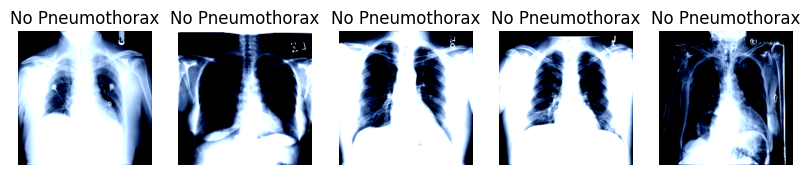

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


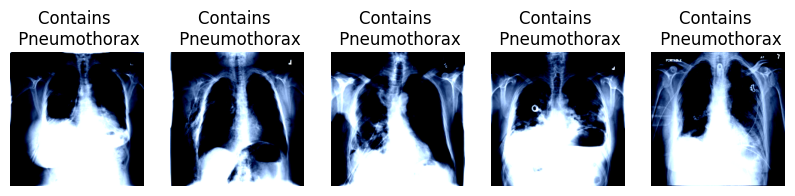

In [ ]:
# Collect samples from each class
class_0_samples = []
class_1_samples = []
for images, labels in test_loader:
    for i in range(len(labels)):
        if labels[i] == 0 and len(class_0_samples) < 5:
            class_0_samples.append(images[i])
        elif labels[i] == 1 and len(class_1_samples) < 5:
            class_1_samples.append(images[i])
    if len(class_0_samples) == 5 and len(class_1_samples) == 5:
        break

# No Pneumothorax
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(np.transpose(class_0_samples[i], (1, 2, 0)))
    plt.title("No Pneumothorax")
    plt.axis('off')
plt.show()

# Pneumothorax
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(np.transpose(class_1_samples[i], (1, 2, 0)))
    plt.title("Contains \n Pneumothorax")
    plt.axis('off')
plt.show()